# Data Visualization P1

In [1]:
import pandas as pd
import numpy as np

import datetime
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import folium
from folium.plugins import MarkerCluster, HeatMap
import pandas as pd

#import sqlite3


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

**Quick view on Accidents**

In [2]:
df_accidents = pd.read_csv("accident_cleaned_data.csv")

In [3]:
df_accidents.head() 

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area
0,200901BS70001,-0.201349,51.512273,2,2,1,2009-01-01,5,15:11:00,12,E09000020,30,1,1,1,0,1
1,200901BS70002,-0.199248,51.514399,2,2,11,2009-01-05,2,10:59:00,12,E09000020,30,1,1,2,0,1
2,200901BS70003,-0.179599,51.486668,3,2,1,2009-01-04,1,14:19:00,12,E09000020,30,1,1,1,0,1
3,200901BS70004,-0.203110,51.507804,2,2,1,2009-01-05,2,08:10:00,12,E09000020,30,1,8,4,0,1
4,200901BS70005,-0.173445,51.482076,2,2,1,2009-01-06,3,17:25:00,12,E09000020,30,4,1,1,0,1


In [4]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898555 entries, 0 to 898554
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              898555 non-null  object 
 1   Longitude                   898555 non-null  float64
 2   Latitude                    898555 non-null  float64
 3   Accident_Severity           898555 non-null  int64  
 4   Number_of_Vehicles          898555 non-null  int64  
 5   Number_of_Casualties        898555 non-null  int64  
 6   Date                        898555 non-null  object 
 7   Day_of_Week                 898555 non-null  int64  
 8   Time                        898555 non-null  object 
 9   Local_Authority_(District)  898555 non-null  int64  
 10  Local_Authority_(Highway)   898555 non-null  object 
 11  Speed_limit                 898555 non-null  int64  
 12  Light_Conditions            898555 non-null  int64  
 13  Weather_Condit

In [5]:
df_accidents.shape

(898555, 17)

In [6]:
df_accidents.describe(include="all")

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area
count,898555,898555.000000,898555.000000,898555.000000,898555.000000,898555.000000,898555,898555.000000,898555,898555.000000,898555,898555.000000,898555.000000,898555.000000,898555.000000,898555.000000,898555.000000
unique,898555,NaN,NaN,NaN,NaN,NaN,2191,NaN,1439,NaN,207,NaN,NaN,NaN,NaN,NaN,NaN
top,200901BS70001,NaN,NaN,NaN,NaN,NaN,2010-10-01,NaN,17:00:00,NaN,E10000016,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,698,NaN,8889,NaN,25989,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-1.393471,52.557925,2.838157,1.826297,1.343093,NaN,4.115010,NaN,350.141962,NaN,38.631375,1.936235,1.551820,1.372541,0.104764,1.349956
std,NaN,1.402066,1.451622,0.398710,0.710371,0.827161,NaN,1.919744,NaN,260.007326,NaN,13.959299,1.641881,1.598791,0.649301,0.714385,0.476956
min,NaN,-7.516225,49.912941,1.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,10.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,NaN,-2.312257,51.483382,3.000000,1.000000,1.000000,NaN,2.000000,NaN,112.000000,NaN,30.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,NaN,-1.335049,52.211135,3.000000,2.000000,1.000000,NaN,4.000000,NaN,325.000000,NaN,30.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,NaN,-0.197891,53.453312,3.000000,2.000000,1.000000,NaN,6.000000,NaN,530.000000,NaN,50.000000,4.000000,1.000000,2.000000,0.000000,2.000000


In [7]:
df_accidents.isna().sum()

Accident_Index                0
Longitude                     0
Latitude                      0
Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Date                          0
Day_of_Week                   0
Time                          0
Local_Authority_(District)    0
Local_Authority_(Highway)     0
Speed_limit                   0
Light_Conditions              0
Weather_Conditions            0
Road_Surface_Conditions       0
Special_Conditions_at_Site    0
Urban_or_Rural_Area           0
dtype: int64

**Quick view on Vehicles**

In [8]:
df_vehicles = pd.read_csv("vehicles_cleaned_data.csv")

In [9]:
df_vehicles.head()

,Accident_Index,Vehicle_Type,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle
0,200901BS70001,2,1,15,1,77,26
1,200901BS70001,9,1,15,1,31,2
2,200901BS70002,19,1,1,1,40,3
3,200901BS70002,11,1,1,1,38,1
4,200901BS70003,3,1,15,1,40,2


In [10]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640704 entries, 0 to 1640703
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Accident_Index                1640704 non-null  object
 1   Vehicle_Type                  1640704 non-null  int64 
 2   Was_Vehicle_Left_Hand_Drive?  1640704 non-null  int64 
 3   Journey_Purpose_of_Driver     1640704 non-null  int64 
 4   Sex_of_Driver                 1640704 non-null  int64 
 5   Age_of_Driver                 1640704 non-null  int64 
 6   Age_of_Vehicle                1640704 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 87.6+ MB


In [11]:
df_vehicles.shape

(1640704, 7)

In [12]:
df_vehicles.describe(include="all")

,Accident_Index,Vehicle_Type,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle
count,1640704,1.640704e+06,1.640704e+06,1.640704e+06,1.640704e+06,1.640704e+06,1.640704e+06
unique,898471,NaN,NaN,NaN,NaN,NaN,NaN
top,2013460234852,NaN,NaN,NaN,NaN,NaN,NaN
freq,67,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.551219e+00,1.004265e+00,7.035593e+00,1.405757e+00,3.927871e+01,7.458439e+00
std,NaN,8.388348e+00,6.516478e-02,5.052299e+00,5.992807e-01,1.515689e+01,3.945962e+00
min,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,NaN,9.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.800000e+01,5.000000e+00
50%,NaN,9.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00
75%,NaN,9.000000e+00,1.000000e+00,1.500000e+01,2.000000e+00,4.800000e+01,9.000000e+00


In [13]:
df_vehicles.isnull().sum()

Accident_Index                  0
Vehicle_Type                    0
Was_Vehicle_Left_Hand_Drive?    0
Journey_Purpose_of_Driver       0
Sex_of_Driver                   0
Age_of_Driver                   0
Age_of_Vehicle                  0
dtype: int64

**Quick view on Casualties**

In [14]:
df_casu= pd.read_csv("casualties_cleaned_data.csv")

In [15]:
df_casu.head()

,Accident_Index,Casualty_Reference,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity,Car_Passenger,Bus_or_Coach_Passenger,Casualty_Type
0,200901BS70001,1,1,77,2,0,0,2
1,200901BS70002,1,1,40,3,0,0,19
2,200901BS70002,2,1,38,3,0,0,11
3,200901BS70002,3,2,76,2,0,4,11
4,200901BS70002,4,1,42,2,0,4,11


In [16]:
df_casu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185983 entries, 0 to 1185982
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   Accident_Index          1185983 non-null  object
 1   Casualty_Reference      1185983 non-null  int64 
 2   Sex_of_Casualty         1185983 non-null  int64 
 3   Age_of_Casualty         1185983 non-null  int64 
 4   Casualty_Severity       1185983 non-null  int64 
 5   Car_Passenger           1185983 non-null  int64 
 6   Bus_or_Coach_Passenger  1185983 non-null  int64 
 7   Casualty_Type           1185983 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 72.4+ MB


In [17]:
df_casu.shape

(1185983, 8)

In [18]:
df_casu.describe(include="all")

,Accident_Index,Casualty_Reference,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity,Car_Passenger,Bus_or_Coach_Passenger,Casualty_Type
count,1185983,1.185983e+06,1.185983e+06,1.185983e+06,1.185983e+06,1.185983e+06,1.185983e+06,1.185983e+06
unique,885429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,20144100J0489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.431425e+00,1.415368e+00,3.576307e+01,2.866305e+00,2.729634e-01,8.525839e-02,7.387409e+00
std,NaN,1.608286e+00,4.927855e-01,1.850742e+01,3.670351e-01,5.857770e-01,5.507572e-01,7.306746e+00
min,NaN,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,1.000000e+00,1.000000e+00,2.100000e+01,3.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
50%,NaN,1.000000e+00,1.000000e+00,3.200000e+01,3.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
75%,NaN,2.000000e+00,2.000000e+00,4.800000e+01,3.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00


In [19]:
df_casu.isna().sum()

Accident_Index            0
Casualty_Reference        0
Sex_of_Casualty           0
Age_of_Casualty           0
Casualty_Severity         0
Car_Passenger             0
Bus_or_Coach_Passenger    0
Casualty_Type             0
dtype: int64

In [20]:
df = pd.DataFrame(df_accidents)

**Heatmap**

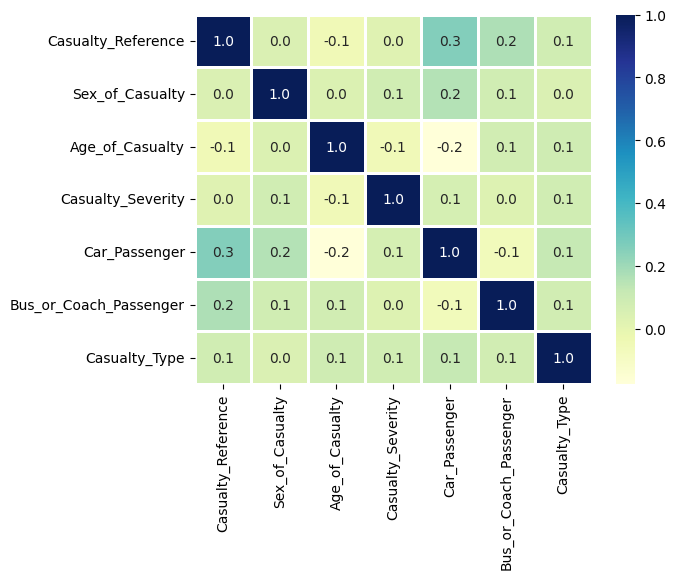

In [21]:
dataplot = sns.heatmap(df_casu.corr(numeric_only=True), cmap="YlGnBu", annot=True,fmt=".1f",linewidths=2)

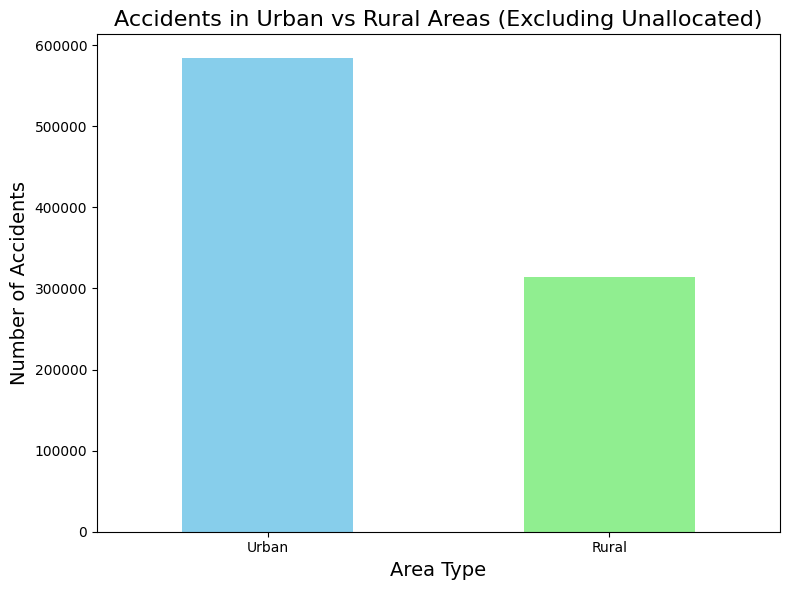

In [24]:
df = pd.DataFrame(df_accidents)

# Step 1: Map the numeric area types to labels
area_labels = {1: 'Urban', 2: 'Rural'}
df['Area_Label'] = df['Urban_or_Rural_Area'].map(area_labels)

# Step 2: Filter out the "Unallocated" areas (Urban_or_Rural_Area = 3)
df_filtered = df[df['Urban_or_Rural_Area'] != 3]

# Step 3: Count the number of accidents in Urban and Rural areas
urban_rural_counts = df_filtered['Area_Label'].value_counts()

# Step 4: Create the bar plot
plt.figure(figsize=(8, 6))
urban_rural_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])

# Step 5: Add labels and title
plt.title('Accidents in Urban vs Rural Areas (Excluding Unallocated)', fontsize=16)
plt.xlabel('Area Type', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=0)  # Keep labels horizontal for better readability

# Step 6: Show the plot
plt.tight_layout()
plt.show()

## Time-Series of Accidents by Hour and Day of the Week

#### Columns Used:
- Day of Week
- Time (HH)
- Number of Accidents

## Distribution of Accident Severity by Weather Conditions

### Columns Used:
- Accident Severity
- Weather Conditions
- Road Surface Conditions
- Speed Limit

## Pie Chart of Casualty Types Based on Vehicle Involvement

### Columns Used:
- Casualty Type
- Vehicle Type
- Number of Vehicles

## Accident Hotspot Map Based on Geo-Coordinates and Number of Casualties

### Columns Used:
- Location Easting OSGR, Location Northing OSGR
- Number of Casualties
- Accident Severity


## Bar Chart of Casualty Severity by Age Group

### Columns Used:
- Casualty Severity
- Age Band of Casualty
- Casualty Class
- Casualty Type

## Correlation Matrix of Accident Factors and Casualty Outcome

### Columns Used:
- Number of Vehicles
- Number of Casualties
- Accident Severity
- Casualty Severity
- Speed Limit
- Weather Conditions

## Scatter Plot of Accidents by Speed Limit and Severity

### Columns Used:
- Accident Severity
- Speed Limit
- Road Type